In [2]:
import pandas as pd
import xarray as xr
import numpy as np
# %matplotlib widget
%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.read_csv('E:\D1\diffusion\my_models\my_model_data\observe_data.csv')
df.drop(['Lat', 'Long', 'Precip', 'avg_Precip'], axis=1, inplace=True)
df = df.set_index(['Stn_No', 'time'])
xr_data = xr.Dataset.from_dataframe(df).to_array()[0]
xr_data['time'] = pd.to_datetime(xr_data['time'])
xr_data = xr_data.drop('variable').sel(time=slice('1994-01-01', '2016-12-01'))
print(xr_data)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\fired\AppData\Local\Temp\ipykernel_29700\1752901651.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('E:\D1\diffusion\my_models\my_model_data\observe_data.csv')


<xarray.DataArray (Stn_No: 2459, time: 276)> Size: 5MB
array([[-0.83798063, -0.88240529, -0.72561235, ..., -0.66812161,
        -0.77787667, -0.80400882],
       [        nan,         nan,         nan, ..., -0.87487344,
        -0.70622459, -0.86127272],
       [-0.79790153, -0.82348361, -0.66231648, ..., -0.79790153,
        -0.71859706, -0.81580899],
       ...,
       [-0.99932848, -0.99932848, -0.74348069, ...,  1.63704533,
         0.40011192, -0.97246782],
       [-0.91857818, -0.96647337, -0.97285939, ...,  2.0413443 ,
         0.71065639,  0.18700236],
       [-0.83948501, -0.994055  , -0.93970072, ...,  1.38988981,
         1.54361051,  1.04847698]])
Coordinates:
  * Stn_No   (Stn_No) int64 20kB 50136 50137 50246 50247 ... 59954 59981 59985
  * time     (time) datetime64[ns] 2kB 1994-01-01 1994-02-01 ... 2016-12-01


C:\Users\fired\AppData\Local\Temp\ipykernel_29700\1752901651.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  xr_data = xr_data.drop('variable').sel(time=slice('1994-01-01', '2016-12-01'))


In [7]:
print(xr_data['time'])
print(sst['time'])

<xarray.DataArray 'time' (time: 276)> Size: 2kB
array(['1994-01-01T00:00:00.000000000', '1994-02-01T00:00:00.000000000',
       '1994-03-01T00:00:00.000000000', ..., '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 1994-01-01 1994-02-01 ... 2016-12-01
<xarray.DataArray 'time' (time: 276)> Size: 2kB
array(['1993-12-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1994-02-01T00:00:00.000000000', ..., '2016-09-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 1993-12-01 1994-01-01 ... 2016-11-01


In [6]:
sst_ncep_file = "E:/D1/f01/data/sst.oisst.mon.mean.1982.nc"
sst = xr.open_dataset(sst_ncep_file)['sst'].sel(lon=slice(160, 210), lat=slice(-10, 10), time=slice('1993-12-01', '2016-11-01'))
sst.attrs = {}
sst['time'].attrs = {}
print(sst)

<xarray.DataArray 'sst' (time: 276, lat: 20, lon: 51)> Size: 1MB
[281520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 160B -9.5 -8.5 -7.5 -6.5 -5.5 ... 5.5 6.5 7.5 8.5 9.5
  * lon      (lon) float64 408B 160.0 161.0 162.0 163.0 ... 208.0 209.0 210.0
  * time     (time) datetime64[ns] 2kB 1993-12-01 1994-01-01 ... 2016-11-01


In [8]:
sst['time'] = xr_data['time']

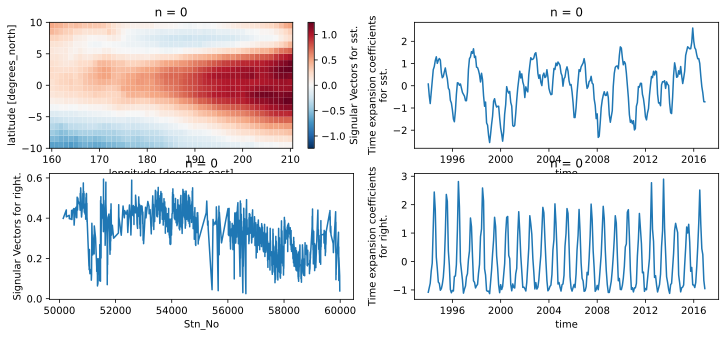

In [9]:
from xMCA import xMCA
import matplotlib.pyplot as plt
svd = xMCA(sst, xr_data) #(23, 25, 28)(23, 25, 48)
svd.solver()
lp, rp = svd.patterns(n=20)
le, re = svd.expansionCoefs(n=20)

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 5))
a = lp[0]
b = rp[0]
a = a.transpose('lat', 'lon')
# b = b.transpose('lat', 'lon')
a.plot(ax=ax1[0])#(2, 28, 25)lon lat
le[0].plot(ax=ax1[1])#(2, 23)
b.plot(ax=ax2[0])#(2, 48, 25)
re[0].plot(ax=ax2[1])#(2, 23)
plt.show(block=True)

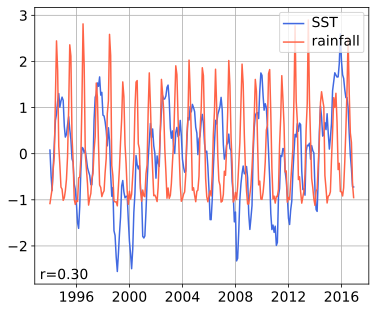

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))

# Convert the time data to numpy's datetime64 format
time_le = le[0].coords['time'].values.astype('datetime64[ns]')
time_re = re[0].coords['time'].values.astype('datetime64[ns]')

# Now you can use the time data in your plot
ax.plot(time_le, le[0].values, label='SST', linewidth=1.5, color='royalblue')  
ax.plot(time_re, re[0].values, label='rainfall', linewidth=1.5, color='tomato')

plt.setp(ax.get_xticklabels(), fontsize=14)  # 设置X轴刻度标签的字体大小
plt.setp(ax.get_yticklabels(), fontsize=14)  # 设置Y轴刻度标签的字体大小

co_matrix = np.corrcoef(le[0], re[0])
co = co_matrix[0,1]

ax.annotate(f'r={co:.2f}', xy=(0, 0), xycoords='axes fraction', 
            xytext=(5, 5), textcoords='offset points', 
            fontsize=14, color='black')

ax.legend(loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize=14)
# plt.text(.01, .99, '(f)', ha='left', va='top', transform=ax.transAxes, fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.5)
plt.show(block=True)
# plt.savefig("./pictures/gh5/f.svg",format="svg")